# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hamilton
Processing Record 2 of Set 1 | san jose village
City not found. Skipping...
Processing Record 3 of Set 1 | ust-nera
Processing Record 4 of Set 1 | al kharijah
Processing Record 5 of Set 1 | tefe
Processing Record 6 of Set 1 | iwaki
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | kerikeri
Processing Record 9 of Set 1 | udachny
Processing Record 10 of Set 1 | garoowe
Processing Record 11 of Set 1 | tangalle
Processing Record 12 of Set 1 | vadso
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | nagqu
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | maydanshakhr
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 21 of Set 1 | loa janan
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hamilton,39.1834,-84.5333,25.87,81,0,5.14,US,1719997661
1,ust-nera,64.5667,143.2000,18.89,54,100,1.36,RU,1719997927
2,al kharijah,25.4514,30.5464,37.41,10,26,1.66,EG,1719997928
3,tefe,-3.3542,-64.7114,22.06,98,93,1.00,BR,1719997929
4,iwaki,37.0500,140.8833,28.76,86,100,2.00,JP,1719997252


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,25.87,81,0,5.14,US,1719997661
1,ust-nera,64.5667,143.2000,18.89,54,100,1.36,RU,1719997927
2,al kharijah,25.4514,30.5464,37.41,10,26,1.66,EG,1719997928
3,tefe,-3.3542,-64.7114,22.06,98,93,1.00,BR,1719997929
4,iwaki,37.0500,140.8833,28.76,86,100,2.00,JP,1719997252


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

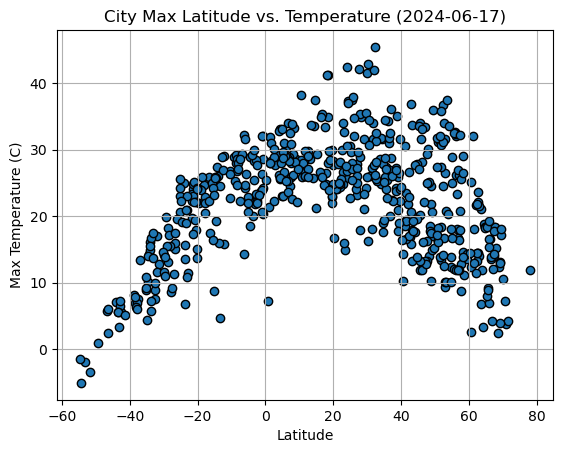

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

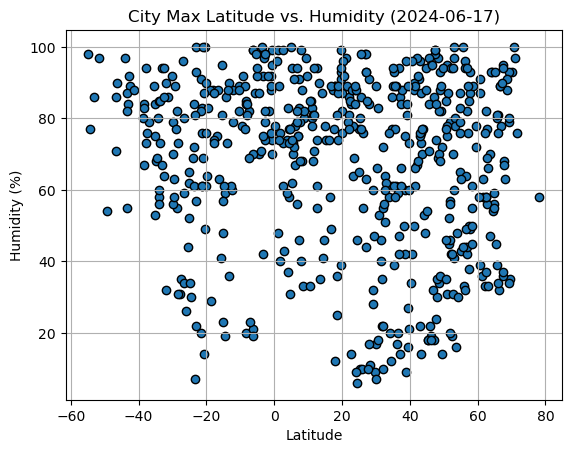

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

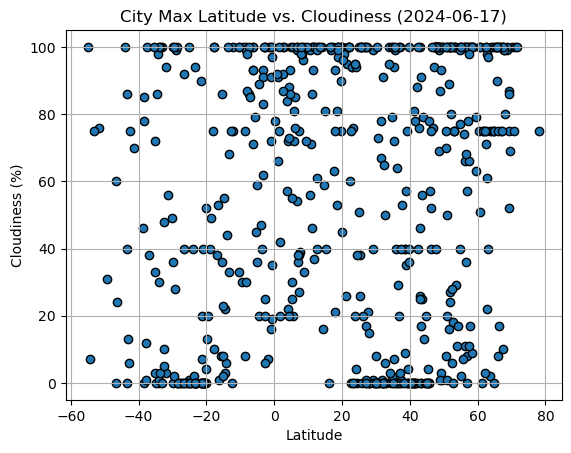

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Max Latitude vs. Cloudiness (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

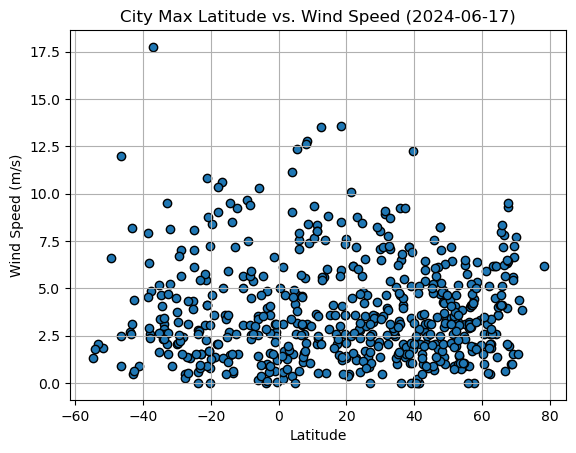

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind Speed (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regressions(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    plt.scatter(x,y)
    plt.plot(x, slope * x + intercept, color='red')
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(x.min(), y.min()),fontsize=15,color="red")
    print(f"The r^2 value is: {rvalue**2}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,25.87,81,0,5.14,US,1719997661
1,ust-nera,64.5667,143.2000,18.89,54,100,1.36,RU,1719997927
2,al kharijah,25.4514,30.5464,37.41,10,26,1.66,EG,1719997928
4,iwaki,37.0500,140.8833,28.76,86,100,2.00,JP,1719997252
7,udachny,66.4167,112.4000,16.51,32,17,7.80,RU,1719997935


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,tefe,-3.3542,-64.7114,22.06,98,93,1.00,BR,1719997929
5,edinburgh of the seven seas,-37.0676,-12.3116,13.34,79,38,17.75,SH,1719997932
6,kerikeri,-35.2268,173.9474,8.89,84,72,1.61,NZ,1719997933
11,waitangi,-43.9535,-176.5597,7.12,97,100,2.68,NZ,1719997940
15,avarua,-21.2078,-159.7750,24.03,83,20,4.12,CK,1719997946


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.301977665104605


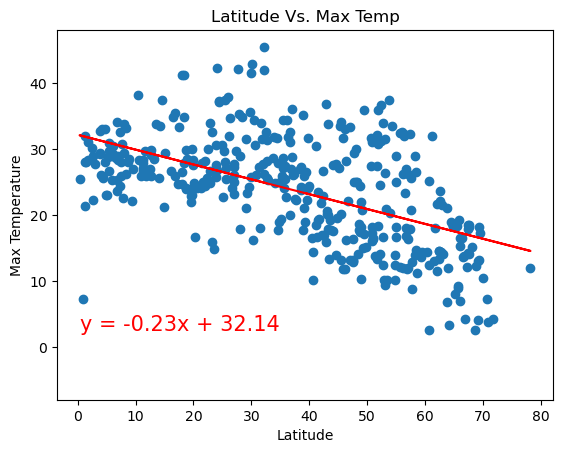

In [20]:
# Linear regression on Northern Hemisphere
plot_linear_regressions(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude Vs. Max Temp")
plt.ylim(-8, 48)
plt.show()

The r^2 value is: 0.702700628992951


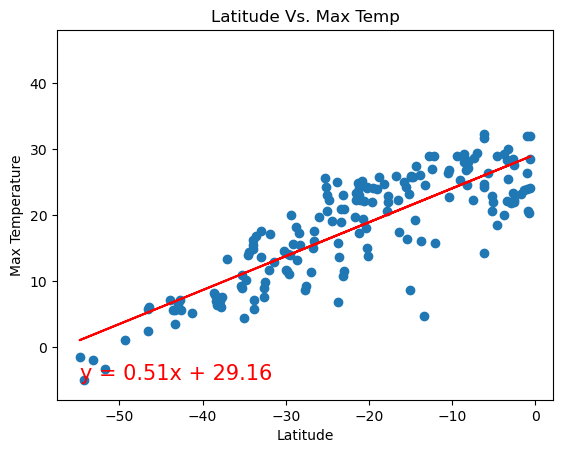

In [23]:
# Linear regression on Southern Hemisphere
plot_linear_regressions(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude Vs. Max Temp")
plt.ylim(-8, 48)
plt.show()

**Discussion about the linear relationship:** The linear regression is modelling the max temperature observed over a random selection of cities by their latitude. It is observed that in the northern hemisphere a strong negative correlation occurs while in the southern hemisphere a slightly stronger correlation is present but in the positive direction. From these results, in the norther hemisphere is can be generally concluded that the lower the latitude, the higher the temperature. In the southern hemisphere the opposite is true, the lower the latitude, the lower the temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.007478447192482908


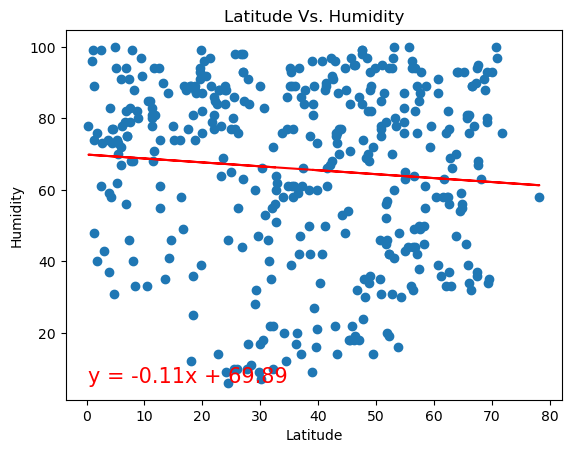

In [24]:
# Northern Hemisphere
plot_linear_regressions(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude Vs. Humidity")
plt.show()

The r^2 value is: 0.0007168373114202851


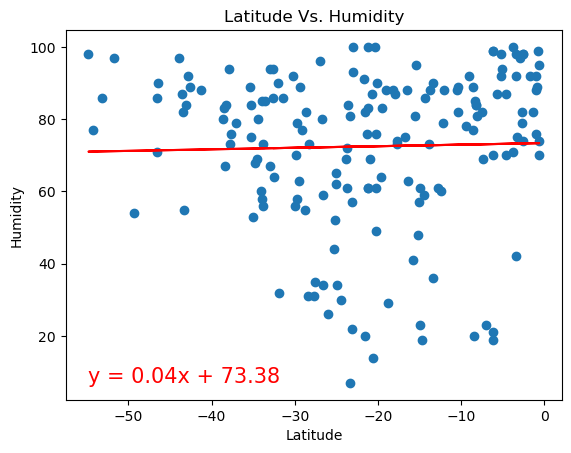

In [25]:
# Southern Hemisphere
plot_linear_regressions(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude Vs. Humidity")
plt.show()

**Discussion about the linear relationship:** The linear regression is modelling the humidity observed over a random selection of cities by their latitude. It is observed that in the northern and southern hemisphere a very weak correlation between latitude and humidity is present as r^2 value for both regressions is below 0.05. The northern hemisphere displays a slightly positive correlation while the southern hemisphere shows a slightly negative correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 4.812022018943698e-05


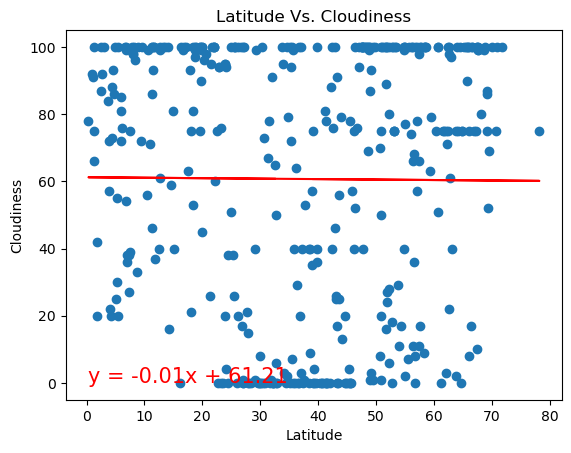

In [26]:
# Northern Hemisphere
plot_linear_regressions(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude Vs. Cloudiness")
plt.show()

The r^2 value is: 0.04112244093834064


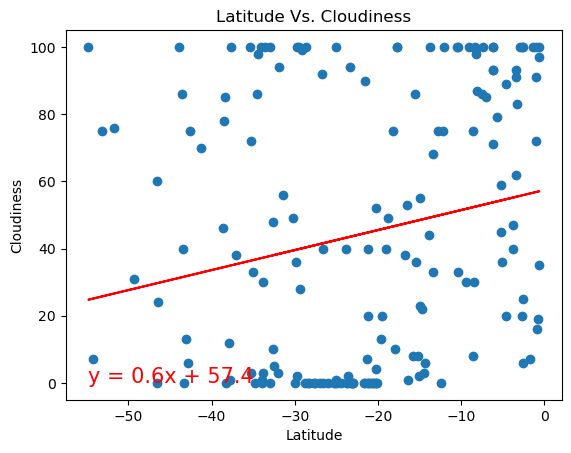

In [27]:
# Southern Hemisphere
plot_linear_regressions(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude Vs. Cloudiness")
plt.show()

**Discussion about the linear relationship:** The linear regression is modelling the cloudiness observed over a random selection of cities by their latitude. It is observed that there is a weak correlation in the negative direction in the northern hemisphere. In the southern hemisphere a very weak positive correlation is seen. This shows that latitudes closer to 0 exhibit slightly more cloudiness than latitudes that are further away from 0. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.003648744672524996


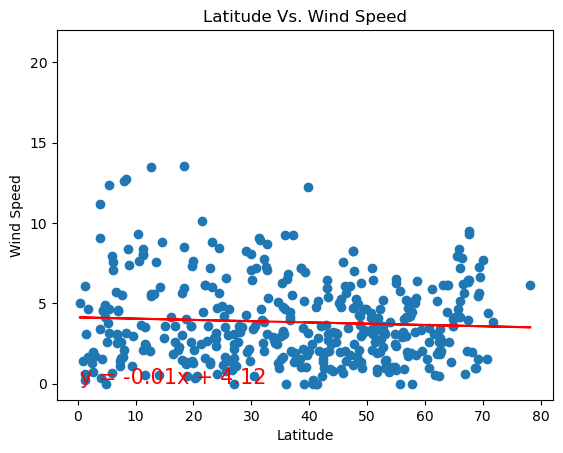

In [28]:
# Northern Hemisphere
plot_linear_regressions(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude Vs. Wind Speed")
plt.ylim(-1, 22)
plt.show()

The r^2 value is: 0.0027380313528895563


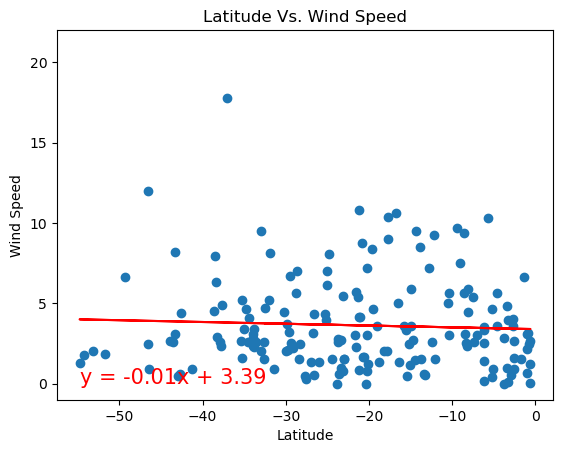

In [29]:
# Southern Hemisphere
plot_linear_regressions(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude Vs. Wind Speed")
plt.ylim(-1, 22)
plt.show()

**Discussion about the linear relationship:** The linear regression is modelling the wind speed observed over a random selection of cities by their latitude. It is observed that in both the northern and southern hemisphere a very weak negative correlation between latitude and wind speed is present as r^2 value for both regressions is below 0.05. 